In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


from xgboost import XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MaxAbsScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
#criação do dataframe
df = pd.read_csv('DataFrame-Modelo.csv')
df = pd.DataFrame(df)
df.columns

Index(['Unnamed: 0', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn','Unnamed: 0'], axis=1)


y = df['Churn']

In [4]:
#separação em teste e treino
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
y = y.map({'No' : 0,
           'Yes' : 1})

In [6]:
#Separação das features
features_categorical = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    
]

features_numeric = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

# Montagem do pipeline

In [7]:
#testando diferentes 

list_clf = [
    LogisticRegressionCV(),
    LogisticRegressionCV(), 
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(class_weight='balanced'),
    SVC(),
    RandomForestClassifier()
   
]




for   algoritmo in  list_clf:


    #separação de tratamento para os tipos de coluna

    numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy='median')),
            ("scaler", StandardScaler())
        ]
    )

    categorical_transformer = Pipeline(
        steps = [
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', ce.OneHotEncoder())
        ]
    )

    #Aplicando o tratamento dos pipelines

    preprocessor = ColumnTransformer(
        transformers= [
            ('numeric', numeric_transformer, features_numeric),
            ('categorical', categorical_transformer, features_categorical)
        ]

    )


    #Definindo os processamamentos 
    pipeline = Pipeline(
        steps=[('preprocessor', preprocessor),
               ('model',  algoritmo),

          ]
    )
    
    #treinamento do modelo
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print('=========================================================')
    print(f'{algoritmo} | score: {round(pipeline.score(X_test, y_test),3)}')
    print('==========================================================')
    print(metrics.classification_report(y_test, y_pred))

LogisticRegressionCV() | score: 0.799
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      3635
         Yes       0.64      0.53      0.58      1295

    accuracy                           0.80      4930
   macro avg       0.74      0.71      0.72      4930
weighted avg       0.79      0.80      0.79      4930

LogisticRegressionCV() | score: 0.799
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      3635
         Yes       0.64      0.53      0.58      1295

    accuracy                           0.80      4930
   macro avg       0.74      0.71      0.72      4930
weighted avg       0.79      0.80      0.79      4930

LogisticRegression() | score: 0.798
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      3635
         Yes       0.63      0.55      0.59      1295

    accuracy                           0.80      4930
   macro avg    

In [8]:
#testando hiperparametros 

solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

for i in solver_list:

    #Pipeline do modelo
    pipeline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('model',  LogisticRegression(random_state=42, solver=i, multi_class="auto", n_jobs=-1, C=1)),

      ]
    )

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print('==============================')
    print(f' {i} | score: {round(pipeline.score(X_test, y_test),3)}')
    print('==============================')


 liblinear | score: 0.799
 newton-cg | score: 0.798
 lbfgs | score: 0.798
 sag | score: 0.798
 saga | score: 0.798


# Métricas de avaliação

In [9]:
#Matriz de confusão
cm =  metrics.confusion_matrix(y_test, y_pred)

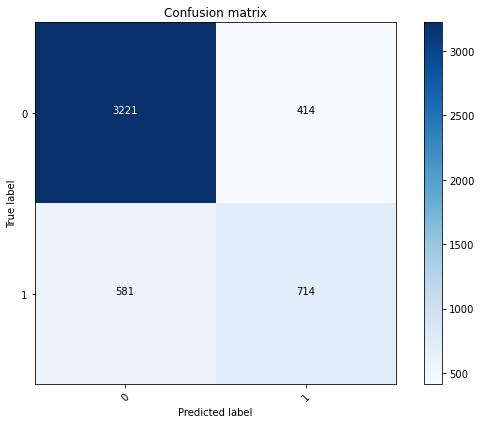

In [10]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
plot_confusion_matrix(cm, classes=[0,1] )

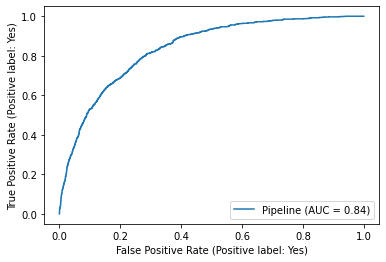

In [11]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(pipeline, X_test, y_test)

In [12]:
# Usando o modelo para fazer predições

In [13]:
forecast = pd.DataFrame({'gender': 'female', 'SeniorCitizen': 1, 'Partner':'No', 'Dependents' : 'Yes', 'tenure': 10,
       'PhoneService' : 'No', 'MultipleLines': 'No', 'InternetService': 'DSL', 'OnlineSecurity' : 'No',
       'OnlineBackup' : 'Yes', 'DeviceProtection' : 'Yes', 'TechSupport' : 'No', 'StreamingTV' : 'No',
       'StreamingMovies': 'Yes', 'Contract' : 'One year', 'PaperlessBilling': 'No', 'PaymentMethod' : 'Electronic check' ,
       'MonthlyCharges' : 28.15, 'TotalCharges' : 108.15}, index=[0])
probability = pipeline.predict_proba(forecast)
print('Eu teria {}% de probabilidade abandonar a assinatura'\
      .format(round(probability[:,1][0]*100, 2)))

Eu teria 18.5% de probabilidade abandonar a assinatura
